In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_path = '../../big_data/rb-suppliers-challange/receipts.csv'

In [5]:
dataset = pd.read_csv(dataset_path, index_col=['id'])
print("Initial shape:", dataset.shape)

dataset = dataset[~dataset.supplier_name.isnull()]
dataset = dataset[~dataset.currency_code.isnull()]
np.random.seed(1)
shuffled = dataset.reindex(np.random.permutation(dataset.index))
print("Shape after filter:", dataset.shape)
print("Columns names:")
print(dataset.columns.values)

unique_supplier_names = shuffled.supplier_name.unique()
unique_currency_codes = shuffled.currency_code.unique()

print("Dataset size {0}".format(len(shuffled)))
print("Unique supplier names {0}".format(len(unique_supplier_names)))
print("Unique currency names {0}".format(len(unique_currency_codes)))

print("Currency codes:")
print(unique_currency_codes)

Initial shape: (9009, 15)
Shape after filter: (9009, 15)
Columns names:
['id.1' 'created_at' 'currency_code' 'total_amount' 'vat_amount' 'date'
 'due_date' 'invoice_number' 'received_via' 'supplier_name' 'ocr_method'
 'manual_review' 'account_default_currency' 'payment_type' 'document_type']
Dataset size 9009
Unique supplier names 1948
Unique currency names 20
Currency codes:
['AUD' 'USD' 'GBP' 'CAD' 'NZD' 'EUR' 'ZAR' 'HKD' 'BGN' 'AED' 'JPY' 'RUB'
 'SGD' 'BRL' 'UAH' 'IDR' 'THB' 'CNY' 'INR' 'NOK']


In [6]:
def find_class_frequencies(dataset, group_col='currency_code'):
    codes = dataset.groupby(group_col).size()
    return codes

currency_codes = find_class_frequencies(dataset)
print('Unique currencies:', len(currency_codes))
print(currency_codes)

currency_names = currency_codes.index.values
currency_counts = currency_codes.values
# plt.bar(range(len(currency_names.tolist())), currency_counts.tolist(), align='edge', alpha=0.5, tick_label=currency_names.tolist())
# plt.xticks(rotation=70);

Unique currencies: 20
currency_code
AED       7
AUD     800
BGN     294
BRL       1
CAD      88
CNY       1
EUR     443
GBP    5658
HKD       9
IDR       1
INR       1
JPY       1
NOK       1
NZD     362
RUB       3
SGD      11
THB       1
UAH       2
USD    1215
ZAR     110
dtype: int64


In [21]:
currency_margin = 20
currency_array = ['Other']
for name, count in zip(currency_codes.index, currency_codes):
    if count > currency_margin:
        currency_array.append(name)
print(currency_array)

['Other', 'AUD', 'BGN', 'CAD', 'EUR', 'GBP', 'NZD', 'USD', 'ZAR']


14
0.575646575647
[ 0.09035409  0.11621712  0.13730714 ...,  0.999778    0.999889    1.        ]


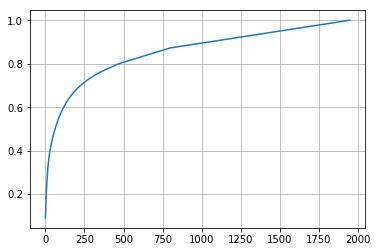

In [43]:
suppliers = find_class_frequencies(dataset, 'supplier_name')
# print('Unique suppliers:', len(suppliers))
# print(suppliers)

suppliers_names = suppliers.index.values
suppliers_counts = suppliers.values
# print(suppliers)

In [44]:
supplier_margin = 1
supplier_array = ['Other']
for name, count in zip(suppliers.index, suppliers):
    if count > supplier_margin:
        supplier_array.append(name)
print(supplier_array)

['Other', '155 Bar and Kitchen', '51st State Tavern', '7-Eleven', 'AMT Coffee', 'ASDA', 'ATM', 'AVIS', 'Abode Machester', 'Accor Hotels', 'Adam Zweig', 'Addison Lee', 'Adelaide Metro', 'Adina Apartment Hotel', 'Admiral Codrington', 'Aidan Wright', 'Air Canada', 'Air New Zealand', 'Airbrake', 'AirportLink', 'Albert STR Gelato', 'Albion Computers', 'Alex Canfor-Dumas', 'Alexis Prenn - Salary only since May 13', 'Alto Cafe SARL', 'Amazon', 'Ambassador Transit Lounge', 'Amelia Whitehouse', 'Andrea Sciutto', 'Angela Mortimer', 'Animoto', 'Ann Savino', 'Anz', 'Apego', 'Apex Hotels', 'Apex Temple', 'Apple Store', 'Apptentive', 'Argos', 'Argyle Bar', 'Aroma Cafe', 'Asana', 'Association Coffee', 'Atlassian', 'Atos Worldline', 'Au Bon Pain', 'Auberge Etchegorry', 'Auckland Transport', 'Australia Online Printing', 'Australia Post', 'Australian Catering', 'Autogrill', 'Avenue Suites', 'B2B Marketing Laboratory', 'BT', 'BWA Merchant Services', 'Baccomatto Osteria', 'Bagel Factory', 'Balsamiq', 'Bal